In [1]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import h2o

In [3]:
data=pd.read_csv('G:\kaggle\home-credit-risk/application_train.csv')

In [4]:
data.shape

(307511, 122)

In [4]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


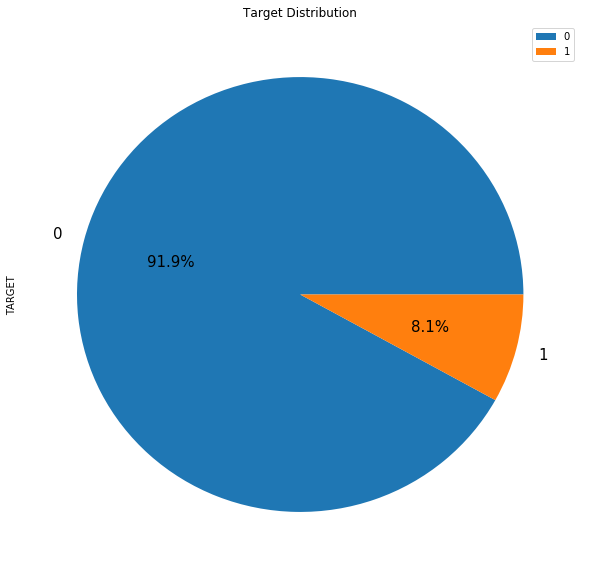

In [5]:
target_distribution = data['TARGET'].value_counts()
target_distribution.plot.pie(figsize=(10, 10),
                             title='Target Distribution',
                             fontsize=15, 
                             legend=True, 
                             autopct=lambda v: "{:0.1f}%".format(v))

In [15]:
data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [14]:
new_data=data.fillna(data.median())

In [22]:
new_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OWN_CAR_AGE                       0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                  

In [26]:
new_data['EXT_SOURCE_1'].isnull().value_counts()

False    307511
Name: EXT_SOURCE_1, dtype: int64

In [4]:
ext_data=data[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','AMT_INCOME_TOTAL','CNT_CHILDREN','AMT_CREDIT','AMT_ANNUITY',
                  'AMT_GOODS_PRICE','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                  'AMT_REQ_CREDIT_BUREAU_MON']]

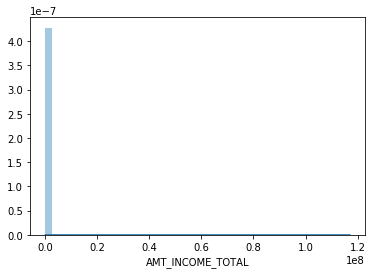

In [60]:
sns.distplot(data.AMT_INCOME_TOTAL)

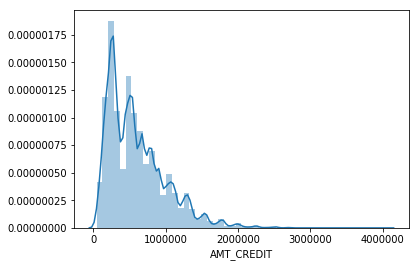

In [68]:
sns.distplot(data.AMT_CREDIT)

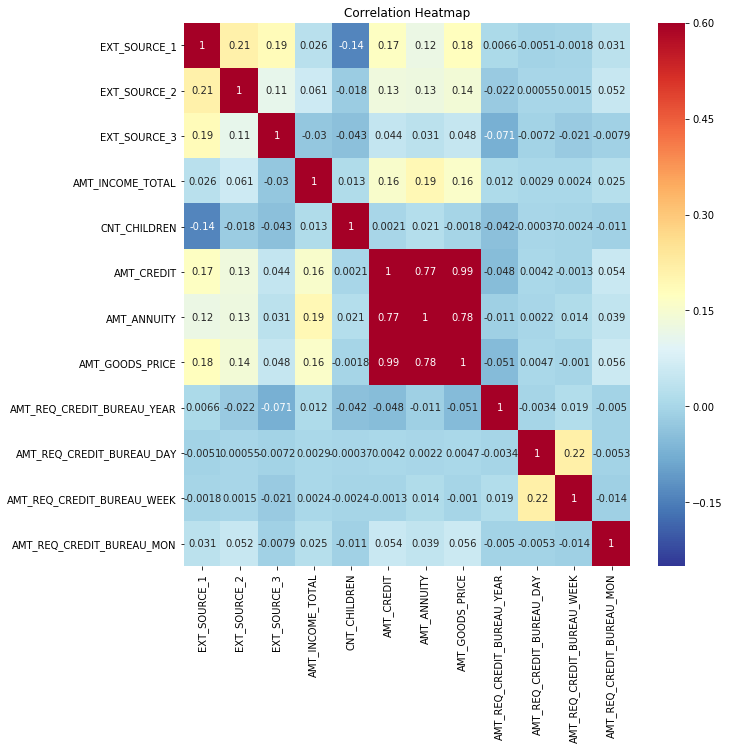

In [10]:
ext_data_corrs = ext_data.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

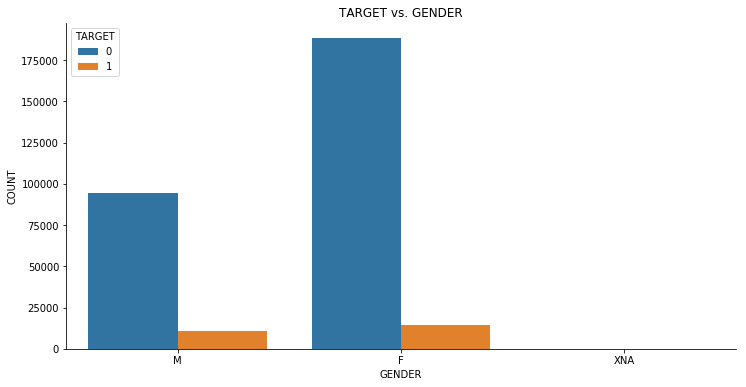

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x='CODE_GENDER', data =data, hue = 'TARGET')
plt.xlabel('GENDER')
plt.ylabel('COUNT')
plt.title('TARGET vs. GENDER')
sns.despine()

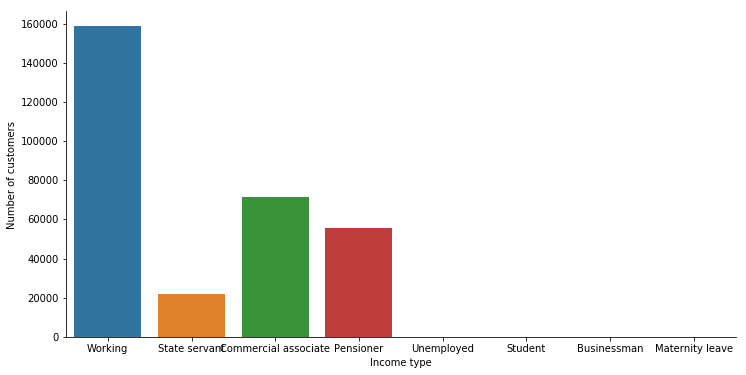

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_INCOME_TYPE', data=data)
plt.xlabel('Income type')
plt.ylabel('Number of customers ')
sns.despine()

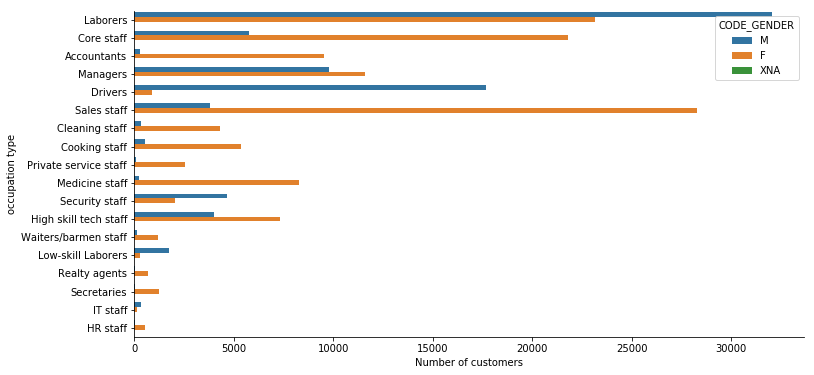

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(y='OCCUPATION_TYPE', data=data,hue='CODE_GENDER')
plt.xlabel('Number of customers')
plt.ylabel('occupation type')
sns.despine()

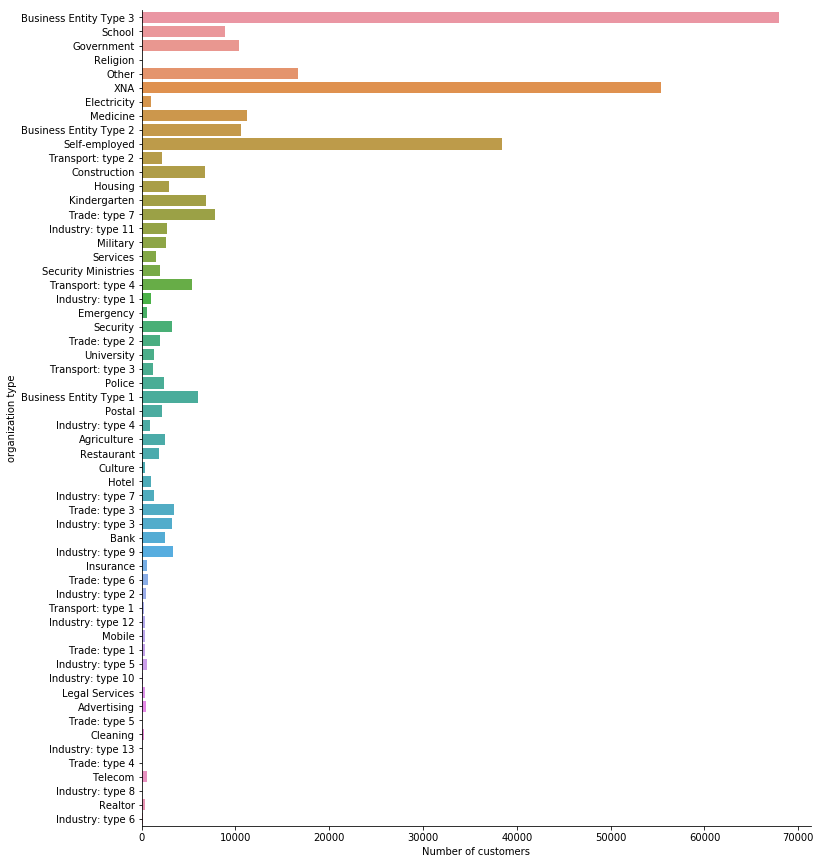

In [74]:
plt.figure(figsize=(12,15))
sns.countplot(y='ORGANIZATION_TYPE', data=data)
plt.xlabel('Number of customers')
plt.ylabel('organization type')
sns.despine()

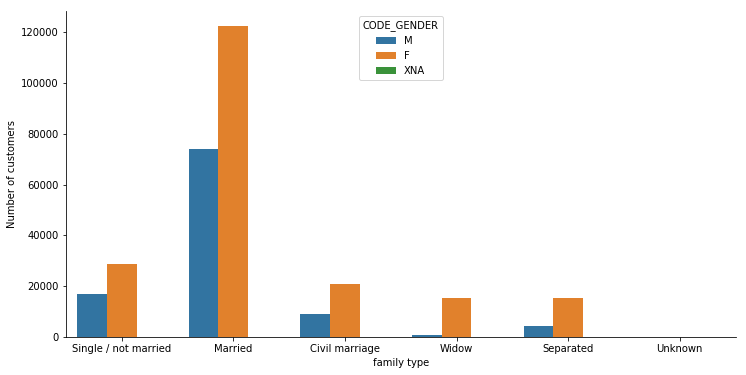

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_FAMILY_STATUS', data=data,hue='CODE_GENDER')
plt.xlabel('family type')
plt.ylabel('Number of customers')
sns.despine()

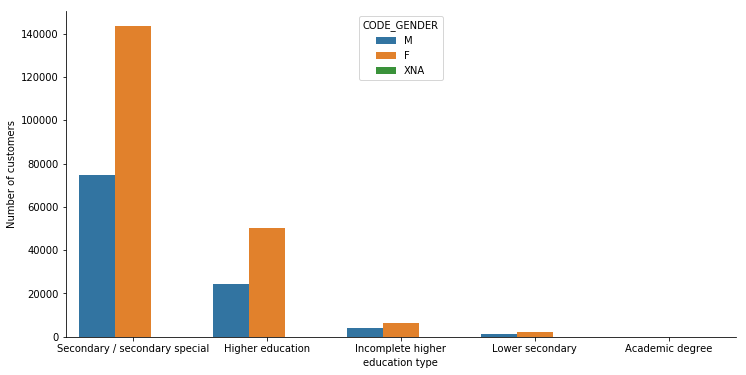

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_EDUCATION_TYPE', data=data,hue='CODE_GENDER')
plt.xlabel('education type')
plt.ylabel('Number of customers')
sns.despine()

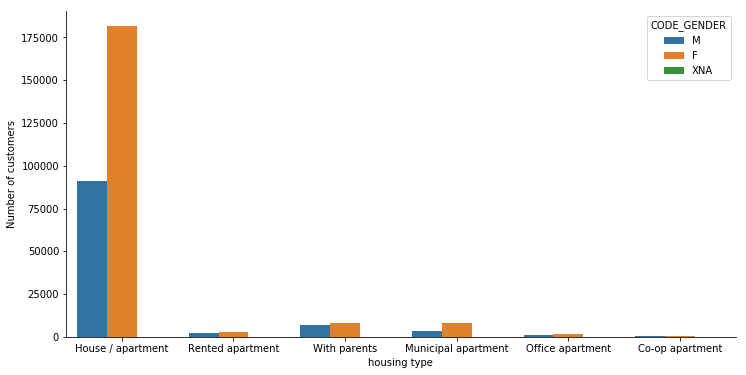

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_HOUSING_TYPE', data=data,hue='CODE_GENDER')
plt.xlabel('housing type')
plt.ylabel('Number of customers')
sns.despine()

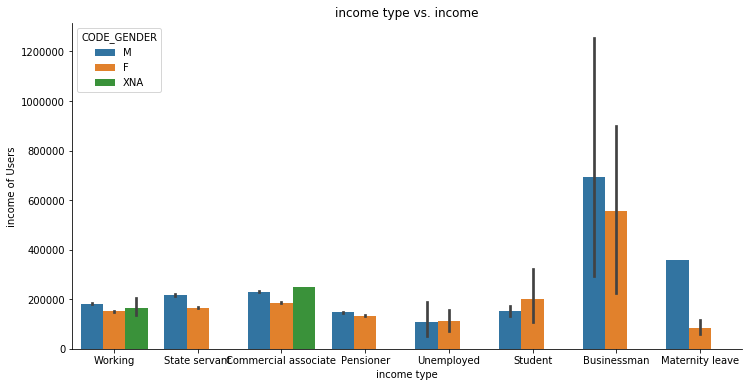

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(y='AMT_INCOME_TOTAL' , x='NAME_INCOME_TYPE',data=data,hue='CODE_GENDER')
plt.xlabel('income type')
plt.ylabel('income of Users')
plt.title('income type vs. income')
sns.despine()

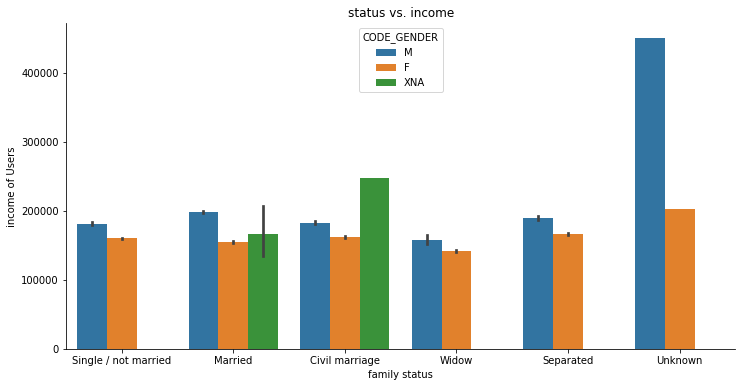

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(y='AMT_INCOME_TOTAL' , x='NAME_FAMILY_STATUS',data=data,hue='CODE_GENDER')
plt.xlabel('family status')
plt.ylabel('income of Users')
plt.title('status vs. income')
sns.despine()

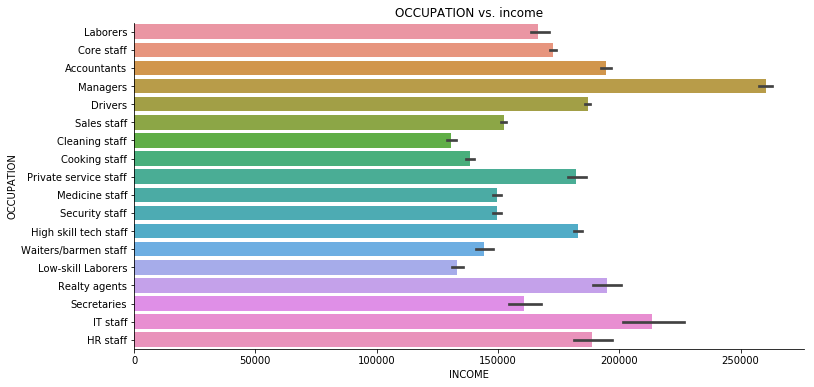

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(y='OCCUPATION_TYPE' , x='AMT_INCOME_TOTAL',data=data)
plt.xlabel('INCOME')
plt.ylabel('OCCUPATION')
plt.title('OCCUPATION vs. income')
sns.despine()

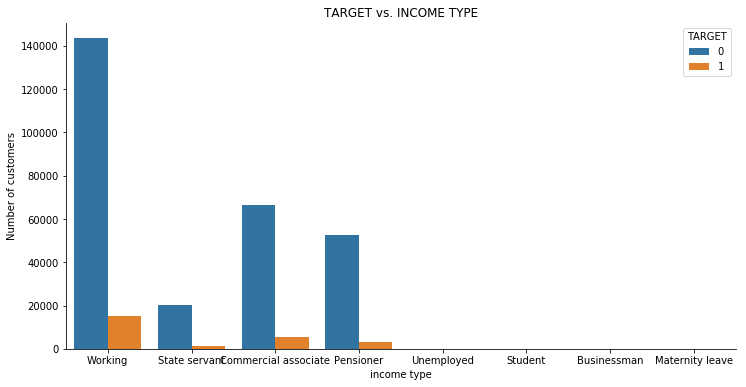

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_INCOME_TYPE', data = data, hue = 'TARGET')
plt.xlabel('income type')
plt.ylabel('Number of customers')
plt.title('TARGET vs. INCOME TYPE')
sns.despine()

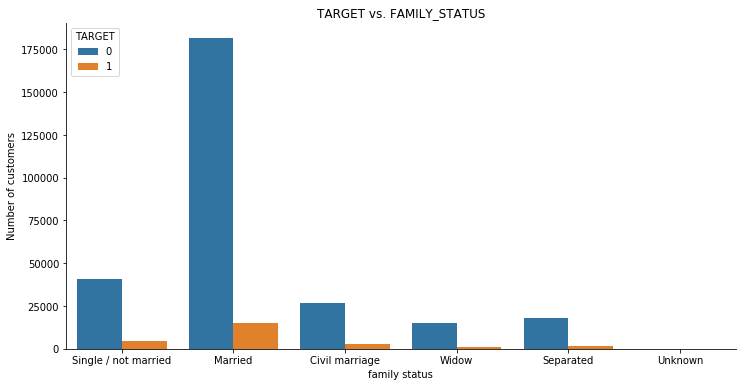

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_FAMILY_STATUS', data =data, hue = 'TARGET')
plt.xlabel('family status')
plt.ylabel('Number of customers')
plt.title('TARGET vs. FAMILY_STATUS')
sns.despine()

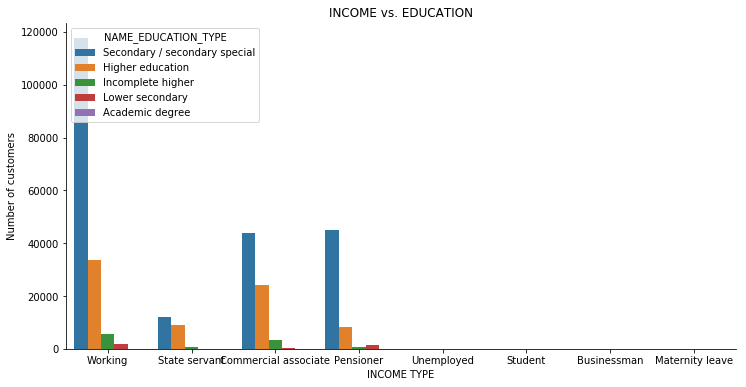

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_INCOME_TYPE', data =data, hue = 'NAME_EDUCATION_TYPE')
plt.xlabel('INCOME TYPE')
plt.ylabel('Number of customers')
plt.title('INCOME vs. EDUCATION')
sns.despine()

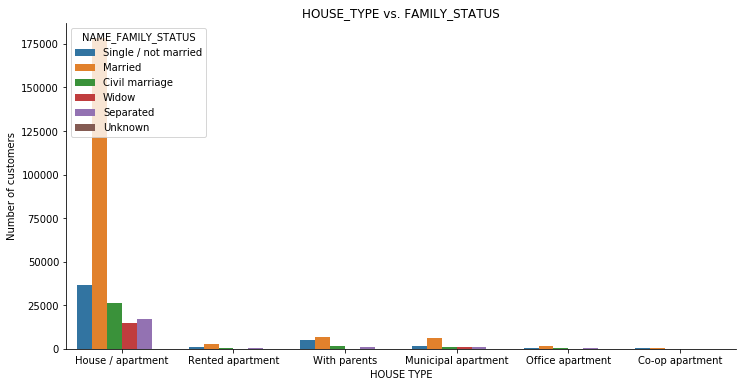

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_HOUSING_TYPE', data =data, hue = 'NAME_FAMILY_STATUS')
plt.xlabel('HOUSE TYPE')
plt.ylabel('Number of customers')
plt.title('HOUSE_TYPE vs. FAMILY_STATUS')
sns.despine()

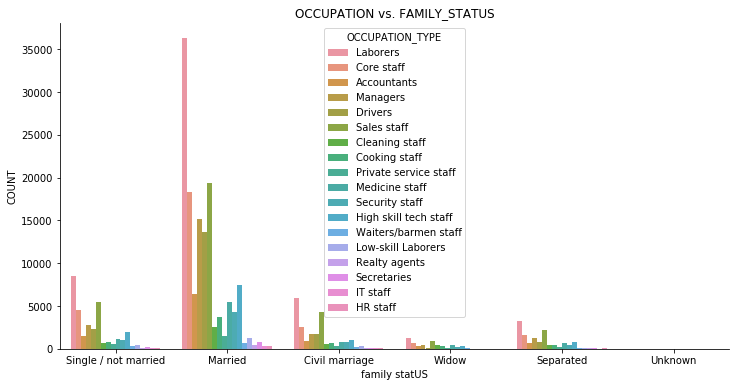

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_FAMILY_STATUS', data =data, hue = 'OCCUPATION_TYPE')
plt.xlabel('family statUS')
plt.ylabel('COUNT')
plt.title('OCCUPATION vs. FAMILY_STATUS')
sns.despine()

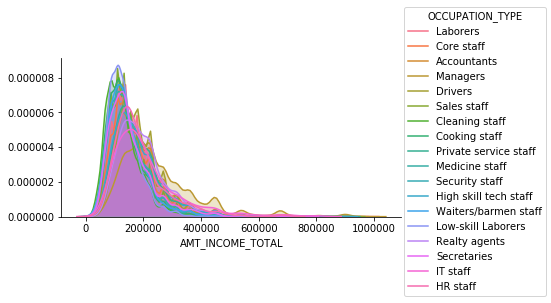

In [59]:
(sns.FacetGrid(data[data['AMT_INCOME_TOTAL'] <1000000],
               hue='OCCUPATION_TYPE',  aspect=2)
  .map(sns.kdeplot, 'AMT_INCOME_TOTAL', shade=True)
 .add_legend()
)
plt.show()

In [25]:
h2o.init(nthreads=-1,max_mem_size="2G")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-win64) (build 25.121-b15, mixed mode)
  Starting server from G:\conda\h2o_jar\h2o.jar
  Ice root: C:\Users\MOUNIK~1\AppData\Local\Temp\tmpseufmqj0
  JVM stdout: C:\Users\MOUNIK~1\AppData\Local\Temp\tmpseufmqj0\h2o_Mounika_kothuri_started_from_python.out
  JVM stderr: C:\Users\MOUNIK~1\AppData\Local\Temp\tmpseufmqj0\h2o_Mounika_kothuri_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,13 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,5 months and 25 days !!!
H2O cluster name:,H2O_from_python_Mounika_kothuri_vyxgcz
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [26]:
data=h2o.H2OFrame(new_data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [27]:
data['TARGET']=data['TARGET'].asfactor()
data['TARGET'].levels()

[['0', '1']]

In [6]:
y='TARGET'
x=list(data.columns)

In [7]:
x.remove(y)
x.remove('SK_ID_CURR')

In [8]:
splits=data.split_frame(ratios=[0.7,0.15],seed=1)
train=splits[0]
valid=splits[1]
test=splits[2]

In [9]:
print (train.nrow)
print (valid.nrow)

215422
45995


In [19]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [20]:
glm_fit1 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm_fit1')

In [21]:
glm_fit1.train(x=x, y=y, training_frame=train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [22]:
glm_fit2 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm_fit2', lambda_search=True)
glm_fit2.train(x=x, y=y, training_frame=train, validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [23]:
glm_perf1 = glm_fit1.model_performance(test)
glm_perf2 = glm_fit2.model_performance(test)

In [24]:
print (glm_perf1)
print (glm_perf2)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.06944946975507571
RMSE: 0.26353267303140177
LogLoss: 0.25303503271714595
Null degrees of freedom: 46093
Residual degrees of freedom: 45952
Null deviance: 25852.80076184814
Residual deviance: 23326.79359612825
AIC: 23610.79359612825
AUC: 0.7354233010586632
Gini: 0.4708466021173263
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14589981192617266: 


,0,1,Error,Rate
0,37114.0,5261.0,0.1242,(5261.0/42375.0)
1,2243.0,1476.0,0.6031,(2243.0/3719.0)
Total,39357.0,6737.0,0.1628,(7504.0/46094.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1458998,0.2823259,194.0
max f2,0.0925309,0.4028569,255.0
max f0point5,0.2221020,0.2630880,132.0
max accuracy,0.7133203,0.9192954,0.0
max precision,0.4285754,0.4202899,38.0
max recall,0.0033296,1.0,399.0
max specificity,0.7133203,0.9999764,0.0
max absolute_mcc,0.1155290,0.2163836,225.0
max min_per_class_accuracy,0.0794400,0.6727552,273.0
max mean_per_class_accuracy,0.0925309,0.6750643,255.0


Gains/Lift Table: Avg response rate:  8.07 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100013,0.3833143,4.7049536,4.7049536,0.3796095,0.3796095,0.0470557,0.0470557,370.4953574,370.4953574
,2,0.0200026,0.3229755,3.6833065,4.1941300,0.2971800,0.3383948,0.0368379,0.0838935,268.3306512,319.4130043
,3,0.0300039,0.2867719,3.4413375,3.9431992,0.2776573,0.3181490,0.0344179,0.1183114,244.1337471,294.3199186
,4,0.0400052,0.2595684,3.1187121,3.7370774,0.2516269,0.3015184,0.0311912,0.1495026,211.8712084,273.7077410
,5,0.0500065,0.2391635,2.7692012,3.5435022,0.2234273,0.2859002,0.0276956,0.1771982,176.9201247,254.3502178
,6,0.1000130,0.1779950,2.5863802,3.0649412,0.2086768,0.2472885,0.1293358,0.3065340,158.6380193,206.4941186
,7,0.1499978,0.1433090,1.9204542,2.6835559,0.1549479,0.2165172,0.0959935,0.4025276,92.0454227,168.3555887
,8,0.2000043,0.1205509,1.7206687,2.4428080,0.1388286,0.1970930,0.0860446,0.4885722,72.0668736,144.2807988
,9,0.2999957,0.0906135,1.3230511,2.0695827,0.1067477,0.1669800,0.1322936,0.6208658,32.3051086,106.9582680
,10,0.4000087,0.0713816,0.9302365,1.7847152,0.0750542,0.1439961,0.0930358,0.7139016,-6.9763465,78.4715247





ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.06944986085156654
RMSE: 0.26353341505692696
LogLoss: 0.253021039895118
Null degrees of freedom: 46093
Residual degrees of freedom: 45961
Null deviance: 25852.80076184814
Residual deviance: 23325.50362585114
AIC: 23591.50362585114
AUC: 0.7354684618014327
Gini: 0.4709369236028653
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1277240614751547: 


,0,1,Error,Rate
0,35663.0,6712.0,0.1584,(6712.0/42375.0)
1,2007.0,1712.0,0.5397,(2007.0/3719.0)
Total,37670.0,8424.0,0.1892,(8719.0/46094.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1277241,0.2819732,213.0
max f2,0.0871677,0.4031630,262.0
max f0point5,0.2165783,0.2625040,137.0
max accuracy,0.7121572,0.9192954,0.0
max precision,0.4898296,0.4174757,23.0
max recall,0.0034804,1.0,399.0
max specificity,0.7121572,0.9999764,0.0
max absolute_mcc,0.1167095,0.2150039,226.0
max min_per_class_accuracy,0.0794279,0.6720472,273.0
max mean_per_class_accuracy,0.0871677,0.6753106,262.0


Gains/Lift Table: Avg response rate:  8.07 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100013,0.3800765,4.6780681,4.6780681,0.3774403,0.3774403,0.0467868,0.0467868,367.8068125,367.8068125
,2,0.0200026,0.3213205,3.6833065,4.1806873,0.2971800,0.3373102,0.0368379,0.0836246,268.3306512,318.0687319
,3,0.0300039,0.2841568,3.4413375,3.9342374,0.2776573,0.3174259,0.0344179,0.1180425,244.1337471,293.4237370
,4,0.0400052,0.2585504,3.2800248,3.7706842,0.2646421,0.3042299,0.0328045,0.1508470,228.0024777,277.0684222
,5,0.0500065,0.2379283,2.6616595,3.5488793,0.2147505,0.2863341,0.0266201,0.1774671,166.1659451,254.8879267
,6,0.1000130,0.1776534,2.5702489,3.0595641,0.2073753,0.2468547,0.1285292,0.3059962,157.0248924,205.9564096
,7,0.1499978,0.1429577,1.9043160,2.6745928,0.1536458,0.2157940,0.0951869,0.4011831,90.4315956,167.4592775
,8,0.2000043,0.1204056,1.7636855,2.4468412,0.1422993,0.1974184,0.0881958,0.4893789,76.3685454,144.6841243
,9,0.2999957,0.0907022,1.3122946,2.0686864,0.1058798,0.1669077,0.1312181,0.6205969,31.2294574,106.8686369
,10,0.4000087,0.0714614,0.9356136,1.7853875,0.0754881,0.1440503,0.0935735,0.7141705,-6.4386375,78.5387456


In [25]:
print (glm_perf1.auc())
print (glm_perf2.auc())

0.7354233010586632
0.7354684618014327


In [26]:
print (glm_fit2.auc(train=True))
print (glm_fit2.auc(valid=True))

0.7499640025843041
0.7420544649633977


In [27]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [28]:
rf_fit1 = H2ORandomForestEstimator(model_id='rf_fit1', seed=1)

In [29]:
rf_fit1.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [31]:
rf_fit2 = H2ORandomForestEstimator(model_id='rf_fit2', ntrees=500, seed=1)
rf_fit2.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [32]:
rf_perf1 = rf_fit1.model_performance(test)
rf_perf2 = rf_fit2.model_performance(test)

In [34]:
print (rf_perf1.auc())
print (rf_perf2.auc())

0.7145046222816581
0.7295626238854769


In [17]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [18]:
gbm_fit1 = H2OGradientBoostingEstimator(model_id='gbm_fit1', seed=1)
gbm_fit1.train(x=x, y=y, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [19]:
gbm_fit2 = H2OGradientBoostingEstimator(model_id='gbm_fit2', ntrees=500, seed=1)
gbm_fit2.train(x=x, y=y, training_frame=train)


gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [20]:
gbm_fit3 = H2OGradientBoostingEstimator(model_id='gbm_fit3', 
                                        ntrees=500, 
                                        score_tree_interval=5,     #used for early stopping
                                        stopping_rounds=3,         #used for early stopping
                                        stopping_metric='AUC',     #used for early stopping
                                        stopping_tolerance=0.0005, #used for early stopping
                                        seed=1)
gbm_fit3.train(x=x, y=y, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [22]:
print(gbm_fit3)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_fit3


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0644233729707005
RMSE: 0.2538175978349423
LogLoss: 0.23280150116037931
Mean Per-Class Error: 0.27651474981911695
AUC: 0.7999374266291674
Gini: 0.5998748532583349
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1606547134802201: 


,0,1,Error,Rate
0,179932.0,18010.0,0.091,(18010.0/197942.0)
1,9727.0,7753.0,0.5565,(9727.0/17480.0)
Total,189659.0,25763.0,0.1288,(27737.0/215422.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1606547,0.3585783,206.0
max f2,0.0894643,0.4623809,273.0
max f0point5,0.2728475,0.3842501,134.0
max accuracy,0.4038893,0.9223988,80.0
max precision,0.9166245,1.0,0.0
max recall,0.0122168,1.0,394.0
max specificity,0.9166245,1.0,0.0
max absolute_mcc,0.1606547,0.2966706,206.0
max min_per_class_accuracy,0.0815675,0.7231664,282.0
max mean_per_class_accuracy,0.0824269,0.7234853,281.0


Gains/Lift Table: Avg response rate:  8.11 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100036,0.4311961,8.2578796,8.2578796,0.6700696,0.6700696,0.0826087,0.0826087,725.7879552,725.7879552
,2,0.0200026,0.3513212,5.6584726,6.9584777,0.4591458,0.5646322,0.0565789,0.1391876,465.8472609,595.8477706
,3,0.0300016,0.3053124,4.7087189,6.2086741,0.3820799,0.5037908,0.0470824,0.1862700,370.8718865,520.8674125
,4,0.0400006,0.2739100,4.1880707,5.7035819,0.3398329,0.4628061,0.0418764,0.2281465,318.8070728,470.3581898
,5,0.0500042,0.2495706,3.6314083,5.2890317,0.2946636,0.4291682,0.0363272,0.2644737,263.1408252,428.9031749
,6,0.1000037,0.1773815,2.6979656,3.9935588,0.2189212,0.3240496,0.1348970,0.3993707,169.7965552,299.3558787
,7,0.1500032,0.1391082,2.0766783,3.3546184,0.1685080,0.2722040,0.1038330,0.5032037,107.6678319,235.4618405
,8,0.2000028,0.1144472,1.6144315,2.9195818,0.1309999,0.2369038,0.0807208,0.5839245,61.4431465,191.9581767
,9,0.3000019,0.0839211,1.2625975,2.3672622,0.1024510,0.1920869,0.1262586,0.7101831,26.2597534,136.7262236
,10,0.4000009,0.0650326,0.8838755,1.9964199,0.0717204,0.1619956,0.0883867,0.7985698,-11.6124517,99.6419851




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.0668349045193018
RMSE: 0.25852447566778236
LogLoss: 0.24369310993266702
Mean Per-Class Error: 0.31515202363413486
AUC: 0.7540876262743328
Gini: 0.5081752525486656
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14228733759759726: 


,0,1,Error,Rate
0,37399.0,4970.0,0.1173,(4970.0/42369.0)
1,2112.0,1514.0,0.5825,(2112.0/3626.0)
Total,39511.0,6484.0,0.154,(7082.0/45995.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1422873,0.2995054,205.0
max f2,0.0716275,0.4088962,285.0
max f0point5,0.2486786,0.2939984,133.0
max accuracy,0.5337540,0.9216219,34.0
max precision,0.8853415,1.0,0.0
max recall,0.0075234,1.0,398.0
max specificity,0.8853415,1.0,0.0
max absolute_mcc,0.1375667,0.2327016,209.0
max min_per_class_accuracy,0.0738544,0.6816068,282.0
max mean_per_class_accuracy,0.0716275,0.6848480,285.0


Gains/Lift Table: Avg response rate:  7.88 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100011,0.4097268,5.5426959,5.5426959,0.4369565,0.4369565,0.0554330,0.0554330,454.2695868,454.2695868
,2,0.0200022,0.3389524,4.2742182,4.9084570,0.3369565,0.3869565,0.0427468,0.0981798,327.4218207,390.8457037
,3,0.0300033,0.2946521,3.8605842,4.5591661,0.3043478,0.3594203,0.0386100,0.1367899,286.0584187,355.9166087
,4,0.0400043,0.2647905,3.6399794,4.3293694,0.2869565,0.3413043,0.0364038,0.1731936,263.9979376,332.9369409
,5,0.0500054,0.2411607,3.3090722,4.1253100,0.2608696,0.3252174,0.0330943,0.2062879,230.9072160,312.5309959
,6,0.1000109,0.1731914,2.5093797,3.3173448,0.1978261,0.2615217,0.1254826,0.3317705,150.9379721,231.7344840
,7,0.1500163,0.1363343,2.0461096,2.8935998,0.1613043,0.2281159,0.1023166,0.4340871,104.6109619,189.3599767
,8,0.2,0.1128521,1.5007652,2.5455047,0.1183123,0.2006740,0.0750138,0.5091009,50.0765219,154.5504688
,9,0.3000109,0.0831724,1.2684777,2.1197982,0.1,0.1671136,0.1268616,0.6359625,26.8477661,111.9798164
,10,0.4,0.0648016,0.9846630,1.8360452,0.0776256,0.1447440,0.0984556,0.7344181,-1.5336975,83.6045229



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2018-08-22 00:14:48,0.102 sec,0.0,0.2730547,0.2815523,0.5,1.0,0.9188569,0.2694904,0.2759500,0.5,1.0,0.9211653
,2018-08-22 00:15:02,14.013 sec,5.0,0.2670104,0.2636949,0.7310287,5.4840311,0.1592734,0.2644710,0.2608105,0.7151689,4.4479087,0.1863898
,2018-08-22 00:15:09,20.901 sec,10.0,0.2643354,0.2568769,0.7393102,5.7743404,0.1683858,0.2624872,0.2552707,0.7231108,4.6327010,0.1656267
,2018-08-22 00:15:18,29.667 sec,15.0,0.2627520,0.2528683,0.7467191,6.0391173,0.1516883,0.2614278,0.2522259,0.7292290,4.7981546,0.1791064
,2018-08-22 00:15:26,38.004 sec,20.0,0.2615522,0.2499361,0.7539273,6.4050035,0.1470463,0.2607241,0.2501629,0.7348047,4.9636082,0.1679965
---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2018-08-22 00:17:10,2 min 21.503 sec,90.0,0.2549133,0.2350387,0.7942031,7.9433481,0.1303395,0.2585499,0.2437929,0.7540561,5.6805739,0.1517991
,2018-08-22 00:17:17,2 min 28.284 sec,95.0,0.2546005,0.2344029,0.7957665,7.9776606,0.1349166,0.2585318,0.2437242,0.7543213,5.6254227,0.1631047
,2018-08-22 00:17:24,2 min 36.097 sec,100.0,0.2542982,0.2338292,0.7971228,8.1263482,0.1235853,0.2585099,0.2436633,0.7544809,5.5978471,0.1614741
,2018-08-22 00:17:31,2 min 42.806 sec,105.0,0.2540487,0.2332771,0.7986804,8.1549420,0.1306320,0.2585116,0.2436652,0.7543769,5.5702715,0.1575171



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
EXT_SOURCE_3,2560.1640625,1.0,0.2585069
EXT_SOURCE_2,2280.7536621,0.8908623,0.2302941
ORGANIZATION_TYPE,1463.9012451,0.5717998,0.1478142
EXT_SOURCE_1,777.8157959,0.3038148,0.0785382
OCCUPATION_TYPE,408.5943298,0.1595969,0.0412569
---,---,---,---
FLAG_DOCUMENT_17,0.0,0.0,0.0
FLAG_DOCUMENT_19,0.0,0.0,0.0
FLAG_DOCUMENT_20,0.0,0.0,0.0
FLAG_DOCUMENT_21,0.0,0.0,0.0



See the whole table with table.as_data_frame()



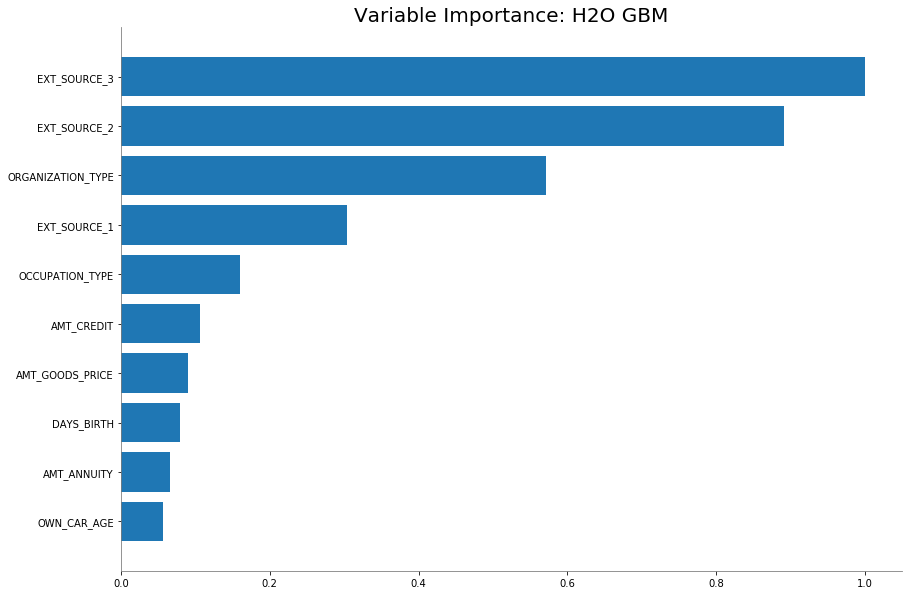

In [27]:
gbm_fit3.varimp_plot()

In [39]:
gbm_perf1 = gbm_fit1.model_performance(test)
gbm_perf2 = gbm_fit2.model_performance(test)
gbm_perf3 = gbm_fit3.model_performance(test)

In [41]:
print (gbm_perf1.auc())
print (gbm_perf2.auc())
print (gbm_perf3.auc())

0.7404721667654182
0.7439255358555008
0.7446497670814228


In [42]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [43]:
dl_fit1 = H2ODeepLearningEstimator(model_id='dl_fit1', seed=1)
dl_fit1.train(x=x, y=y, training_frame=train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [44]:
dl_fit2 = H2ODeepLearningEstimator(model_id='dl_fit2', 
                                   epochs=20, 
                                   hidden=[10,10],
                                   score_interval=1,          #used for early stopping
                                   stopping_rounds=3,         #used for early stopping
                                   stopping_metric='AUC',     #used for early stopping
                                   stopping_tolerance=0.0005, #used for early stopping
                                   seed=1)
dl_fit2.train(x=x, y=y, training_frame=train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [45]:
dl_perf1 = dl_fit1.model_performance(test)
dl_perf2 = dl_fit2.model_performance(test)

In [47]:
print (dl_perf1.auc())
print (dl_perf2.auc())

0.6775445392828503
0.6993890672231649


In [54]:
# Import H2O Grid Search:
from h2o.grid.grid_search import H2OGridSearch

# Import H2O GBM:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [58]:
gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)], 
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

# Search criteria
search_criteria2 = {'strategy': 'RandomDiscrete', 'max_models': 36}

In [59]:
gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria2)
gbm_grid2.train(x=x, y=y, 
                training_frame=train, 
                validation_frame=valid, 
                ntrees=100,
                seed=1)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [60]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='auc', decreasing=True)

In [62]:
print (gbm_gridperf2)

          col_sample_rate learn_rate max_depth         sample_rate  \
0      0.7000000000000001        0.1         5                 0.9   
1                     0.4       0.08         5  0.6000000000000001   
2                     1.0       0.09         7                 0.9   
3                     0.8       0.07         4                 0.8   
4                     0.4       0.08         4                 0.8   
5                     0.2       0.05         7                 0.5   
6                     0.2       0.06         5                 0.5   
7                     0.1       0.04         9  0.6000000000000001   
8                     0.4       0.04         7                 0.9   
9                     0.1       0.07         4                 1.0   
10                    0.1       0.09         8  0.7000000000000001   
11                    0.1       0.08         3  0.7000000000000001   
12                    0.1       0.04        10                 0.8   
13                  

In [63]:
best_gbm_model = gbm_gridperf2.models[0]

In [65]:
gbm_perf = best_gbm_model.model_performance(test)
print (gbm_perf.auc())

0.7448865992301353


In [10]:
from h2o.automl import H2OAutoML

In [11]:
aml = H2OAutoML(max_models = 10,max_runtime_secs=100, seed = 1)
aml.train(x = x, y = y, training_frame = train,validation_frame=valid)

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [12]:
lb = aml.leaderboard

In [13]:
lb.head()

model_id,auc,logloss
DRF_0_AutoML_20180821_234135,0.706639,0.260443
StackedEnsemble_AllModels_0_AutoML_20180821_234135,0.706581,0.261037
StackedEnsemble_BestOfFamily_0_AutoML_20180821_234135,0.706581,0.261037


In [14]:
lb.head(rows=lb.nrows)

model_id,auc,logloss
DRF_0_AutoML_20180821_234135,0.706639,0.260443
StackedEnsemble_AllModels_0_AutoML_20180821_234135,0.706581,0.261037
StackedEnsemble_BestOfFamily_0_AutoML_20180821_234135,0.706581,0.261037
